In [1]:
TRAIN_PATH = '../data/raw/train/'
TEST_PATH  = '../data/raw/test/'

In [2]:
import cv2
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_dir = pathlib.Path(TRAIN_PATH)

In [4]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(data_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

738 738
636 1374
621 1995
582 2577
379 2956
427 3383
389 3772
394 4166
463 4629


In [5]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [6]:
df.columns = ['image_path', 'label']

In [7]:
def read_shape(row):
    # read image
    img = cv2.imread(row[0], -1)
    
    # get shape
    sh = img.shape
    
    return pd.Series(list(sh))

In [8]:
df[['height', 'width']] = df.apply(lambda row: read_shape(row), axis=1)

In [9]:
df['aspect ratio'] = df['width'] / df['height']

In [10]:
df.groupby('label').describe()

height                                                           width  \
       count        mean        std   min    25%    50%    75%    max  count   
label                                                                          
1      738.0  107.754743  14.261305  64.0   99.0  106.5  116.0  160.0  738.0   
2      636.0  110.062893  16.172373  53.0   99.0  108.0  118.0  179.0  636.0   
3      621.0  107.064412  14.092747  63.0   99.0  106.0  115.0  160.0  621.0   
4      582.0  108.731959  14.344314  52.0  100.0  108.0  118.0  155.0  582.0   
5      379.0  109.134565  16.300269  59.0   98.0  107.0  118.5  159.0  379.0   
6      427.0  107.437939  15.516696  53.0   98.0  106.0  116.0  159.0  427.0   
7      389.0  108.627249  14.913060  59.0   99.0  107.0  116.0  202.0  389.0   
8      394.0  109.708122  14.670203  76.0   99.0  108.0  117.0  160.0  394.0   
9      463.0  108.224622  13.757378  59.0  100.0  107.0  116.0  150.0  463.0   

                  ...             aspect ratio                                \
            mean  ...   75%   max        count      mean       std       min   
label             ...                                                          
1      21.421409  ...  22.0  62.0        738.0  0.200587  0.038924  0.105960   
2      36.773585  ...  39.0  61.0        636.0  0.338654  0.051445  0.175000   
3      42.745572  ...  46.0  61.0        621.0  0.404506  0.059117  0.263566   
4      39.273196  ...  42.0  64.0        582.0  0.364746  0.055205  0.163793   
5      35.955145  ...  38.0  55.0        379.0  0.335602  0.050648  0.225352   
6      40.707260  ...  43.0  57.0        427.0  0.384827  0.058887  0.200000   
7      43.329049  ...  46.0  78.0        389.0  0.403864  0.054205  0.194690   
8      41.469543  ...  44.0  60.0        394.0  0.382227  0.043244  0.254902   
9      40.889849  ...  43.0  64.0        463.0  0.381779  0.045083  0.204724   

                                               
            25%       50%       75%       max  
label                                          
1      0.180551  0.194915  0.210526  0.568807  
2      0.314683  0.339623  0.361702  0.698113  
3      0.371681  0.401869  0.429825  0.714286  
4      0.333333  0.370370  0.396040  0.565217  
5      0.308372  0.336634  0.357895  0.593750  
6      0.353492  0.383838  0.408248  0.735849  
7      0.379630  0.398305  0.428571  0.703125  
8      0.359459  0.385896  0.406250  0.542169  
9      0.357798  0.380952  0.400000  0.610169  

[9 rows x 24 columns]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,4629.0,4.471808,2.639520,1.00000,2.000000,4.000000,7.000000,9.000000
height,4629.0,108.472456,14.878445,52.00000,99.000000,107.000000,117.000000,202.000000
width,4629.0,37.099590,8.491328,14.00000,34.000000,39.000000,43.000000,78.000000
aspect ratio,4629.0,0.346268,0.084521,0.10596,0.308943,0.362637,0.397959,0.735849


In [12]:
#new_image_width = 40//2
#new_image_height = 108//2
#size = len(df)
#train_full_labels = df['label'].values
#train_full_set = np.empty((size, new_image_height, new_image_width, 1), dtype=np.float32)
#
#for idx, path in enumerate(df['image_path']):
#    img = cv2.imread(path, -1)
#    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
#    train_full_set[idx] = img.reshape(new_image_height, new_image_width, 1)
#    
#
#print('train_full_set.shape =>', train_full_set.shape)
#print('train_full_labels.shape =>', train_full_labels.shape)

In [12]:
train = []

for i in range(1, 10):
    train.append(df[df['label'] == i].sample(500, replace=True))
    
traindf = pd.concat(train, axis=0, ignore_index=True)
traindf

,image_path,label,height,width,aspect ratio
0,../data/raw/train/1/vaxalpr_1125NRT_20201111_1...,1,103,20,0.194175
1,../data/raw/train/1/vaxalpr_1798DRT_20201114_0...,1,83,17,0.204819
2,../data/raw/train/1/vaxalpr_1941FRT_20201110_1...,1,106,20,0.188679
3,../data/raw/train/1/vaxalpr_1998YRT_20201110_1...,1,106,21,0.198113
4,../data/raw/train/1/vaxalpr_2319YRT_20201116_1...,1,91,18,0.197802
...,...,...,...,...,...
4495,../data/raw/train/9/vaxalpr_1293MRT_20201116_0...,9,106,36,0.339623
4496,../data/raw/train/9/vaxalpr_2962LRT_20201114_1...,9,91,37,0.406593
4497,../data/raw/train/9/vaxalpr_2798TMB_20201110_1...,9,103,40,0.388350
4498,../data/raw/train/9/vaxalpr_2179YRT_20201115_0...,9,92,38,0.413043


In [13]:
new_image_width = 40//2
new_image_height = 108//2
size = len(traindf)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,1))
train_full_labels = traindf['label'].values
train_full_set = np.empty((size, new_image_height, new_image_width, 1), dtype=np.float32)

for idx, path in enumerate(traindf['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    train_full_set[idx] = final.reshape(new_image_height, new_image_width, 1)

print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (4500, 54, 20, 1)
train_full_labels.shape => (4500,)


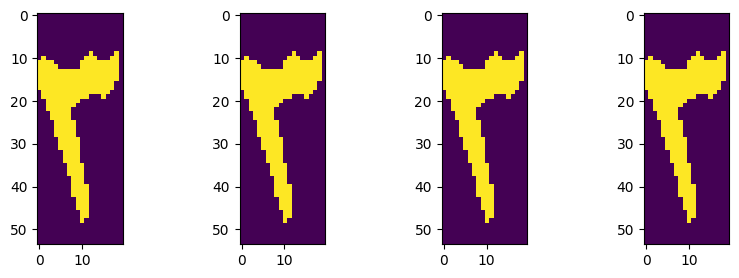

In [15]:
#kernel = np.ones((3,1),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,1))

img = train_full_set[1391]
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

fig, ax = plt.subplots(1, 4, figsize=(10, 3))
ax[0].imshow(img)
ax[1].imshow(opening)
ax[2].imshow(closing)
ax[3].imshow(final)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.05, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (4275, 54, 20, 1)
X_valid.shape => (225, 54, 20, 1)
y_train.shape => (4275,)
y_valid.shape => (225,)


In [31]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    validation_split=0)

In [17]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=[108//2, 40//2]),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1080)              0         
                                                                 
 rescaling (Rescaling)       (None, 1080)              0         
                                                                 
 dense (Dense)               (None, 512)               553472    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100)

Epoch 1/100
134/134 [==============================] - 2s 5ms/step - loss: 0.5956 - accuracy: 0.8260 - val_loss: 0.1223 - val_accuracy: 0.9644
Epoch 2/100
134/134 [==============================] - 0s 4ms/step - loss: 0.1986 - accuracy: 0.9460 - val_loss: 0.0820 - val_accuracy: 0.9733
Epoch 3/100
134/134 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.9637 - val_loss: 0.0694 - val_accuracy: 0.9778
Epoch 4/100
134/134 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9677 - val_loss: 0.0713 - val_accuracy: 0.9911
Epoch 5/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9724 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 6/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9773 - val_loss: 0.0501 - val_accuracy: 0.9867
Epoch 7/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0677 - accuracy: 0.9801 - val_loss: 0.0522 - val_accuracy: 0.9911

Epoch 58/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.0531 - val_accuracy: 0.9911
Epoch 59/100
134/134 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0375 - val_accuracy: 0.9956
Epoch 60/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9967 - val_loss: 0.0402 - val_accuracy: 0.9911
Epoch 61/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0465 - val_accuracy: 0.9911
Epoch 62/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0553 - val_accuracy: 0.9956
Epoch 63/100
134/134 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.0338 - val_accuracy: 0.9956
Epoch 64/100
134/134 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0352 - val_accuracy:

In [32]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=datagen.flow(X_valid, y_valid),
    epochs=100)

Epoch 1/100
134/134 [==============================] - 2s 12ms/step - loss: 1.7201 - accuracy: 0.6365 - val_loss: 0.6246 - val_accuracy: 0.8000
Epoch 2/100
134/134 [==============================] - 1s 10ms/step - loss: 0.9060 - accuracy: 0.7130 - val_loss: 0.4632 - val_accuracy: 0.8489
Epoch 3/100
134/134 [==============================] - 1s 10ms/step - loss: 0.7948 - accuracy: 0.7523 - val_loss: 0.3944 - val_accuracy: 0.8444
Epoch 4/100
134/134 [==============================] - 1s 11ms/step - loss: 0.7288 - accuracy: 0.7665 - val_loss: 0.3924 - val_accuracy: 0.8711
Epoch 5/100
134/134 [==============================] - 1s 11ms/step - loss: 0.6638 - accuracy: 0.7946 - val_loss: 0.3541 - val_accuracy: 0.8711
Epoch 6/100
134/134 [==============================] - 1s 11ms/step - loss: 0.5944 - accuracy: 0.8133 - val_loss: 0.3141 - val_accuracy: 0.9156
Epoch 7/100
134/134 [==============================] - 1s 10ms/step - loss: 0.5614 - accuracy: 0.8306 - val_loss: 0.3079 - val_accuracy:

134/134 [==============================] - 1s 11ms/step - loss: 0.2895 - accuracy: 0.9092 - val_loss: 0.1016 - val_accuracy: 0.9689
Epoch 53/100
134/134 [==============================] - 1s 10ms/step - loss: 0.3080 - accuracy: 0.9057 - val_loss: 0.1399 - val_accuracy: 0.9600
Epoch 54/100
134/134 [==============================] - 1s 10ms/step - loss: 0.3338 - accuracy: 0.8968 - val_loss: 0.1423 - val_accuracy: 0.9644
Epoch 55/100
134/134 [==============================] - 1s 10ms/step - loss: 0.3151 - accuracy: 0.9004 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 56/100
134/134 [==============================] - 1s 11ms/step - loss: 0.3032 - accuracy: 0.9137 - val_loss: 0.1521 - val_accuracy: 0.9600
Epoch 57/100
134/134 [==============================] - 1s 11ms/step - loss: 0.3095 - accuracy: 0.9088 - val_loss: 0.1142 - val_accuracy: 0.9644
Epoch 58/100
134/134 [==============================] - 1s 11ms/step - loss: 0.2874 - accuracy: 0.9109 - val_loss: 0.1629 - val_accuracy: 0.946

In [21]:
test_dir = pathlib.Path(TEST_PATH)

In [22]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(test_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

100 100
100 200
100 300
100 400
100 500
100 600
100 700
100 800
100 900


In [23]:
test_df = pd.concat(dfs, axis=0, ignore_index=True)
test_df.columns = ['image_path', 'label']

In [24]:
test_full_labels = test_df['label'].values
test_full_set = np.empty((900, new_image_height, new_image_width, 1), dtype=np.float32)
for idx, path in enumerate(test_df['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    final = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    test_full_set[idx] = final.reshape(new_image_height, new_image_width, 1)
    
print('test_full_set.shape =>', test_full_set.shape)
print('test_full_labels.shape =>', test_full_labels.shape)

test_full_set.shape => (900, 54, 20, 1)
test_full_labels.shape => (900,)


In [33]:
y_pred = np.argmax(model.predict(test_full_set), axis=-1)

In [34]:
test_df['pred'] = y_pred

In [35]:
misses = test_df[test_df['label'] != test_df['pred']]

In [36]:
misses

,image_path,label,pred
69,../data/raw/test/1/vaxalpr_111AAA_20201115_142...,1,2
121,../data/raw/test/2/vaxalpr_278GSA_20201115_151...,2,3
157,../data/raw/test/2/vaxalpr_214AYT_20201113_111...,2,3
218,../data/raw/test/3/vaxalpr_347ATH_20201115_130...,3,4
370,../data/raw/test/4/vaxalpr_214AYT_20201113_111...,4,9
593,../data/raw/test/6/vaxalpr_856ETC_20201114_124...,6,9
818,../data/raw/test/9/vaxalpr_593DFT_20201111_120...,9,6
882,../data/raw/test/9/vaxalpr_849GSA_20201111_143...,9,6


label:  1 , pred:  2


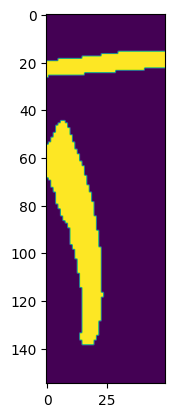

label:  2 , pred:  3


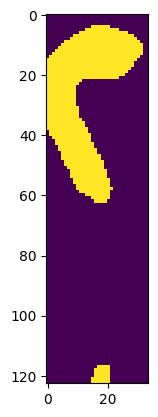

label:  2 , pred:  3


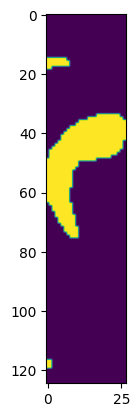

label:  3 , pred:  4


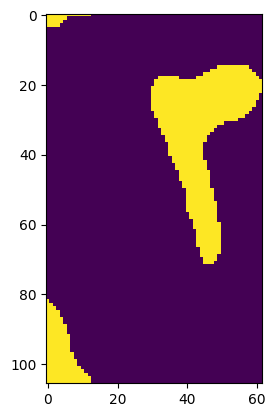

label:  4 , pred:  9


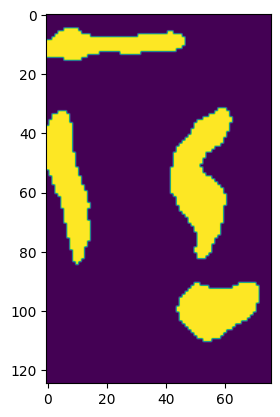

label:  6 , pred:  9


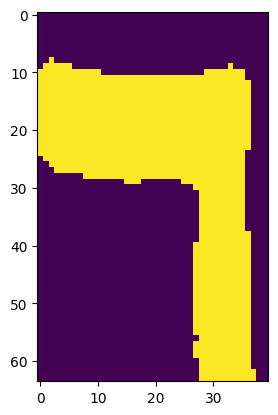

label:  9 , pred:  6


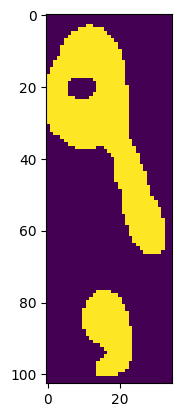

label:  9 , pred:  6


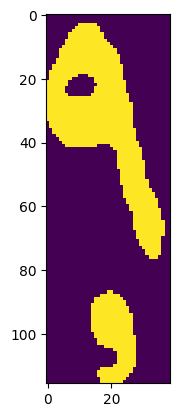

In [37]:
for i in range(len(misses)):
    img = plt.imread(misses.iloc[i][0])
    plt.imshow(img)
    print('label: ', misses.iloc[i][1], ', pred: ', misses.iloc[i][2])
    plt.show()